In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")

In [5]:
url = 'https://drive.google.com/file/d/1EAsaLGrx28UxGb1pGh_miaKW2XbKfS5T/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [6]:
df

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
0,Start,0,0.0,NaN,228,Successful,0.0,0.0,NaN,NaN,OpenPlay
1,Start,0,0.0,NaN,151,Successful,0.0,0.0,NaN,NaN,OpenPlay
2,Pass,0,1.0,120755.0,151,Successful,50.0,50.0,32.2,68.1,OpenPlay
3,Pass,0,3.0,361890.0,151,Successful,31.3,63.4,28.4,32.4,OpenPlay
4,Pass,0,7.0,31713.0,151,Unsuccessful,28.4,32.4,54.6,6.2,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1647,End,94,5.0,NaN,151,Successful,0.0,0.0,NaN,NaN,OpenPlay
1648,End,0,0.0,NaN,151,Successful,0.0,0.0,NaN,NaN,OpenPlay
1649,End,0,0.0,NaN,228,Successful,0.0,0.0,NaN,NaN,OpenPlay
1650,FormationSet,0,0.0,NaN,151,Successful,0.0,0.0,NaN,NaN,OpenPlay


In [2]:
events = pd.read_csv('./combined_Liverpool.csv')

In [4]:
mask = ((events.Event == 'Pass') & (events.Player == 318871))
passData = events.loc[mask]
passData.head()

,Event,Player,Team,Outcome,X,Y,endX,endY
32,Pass,318871.0,26,Successful,82.1,26.4,96.6,63.7
39,Pass,318871.0,26,Unsuccessful,73.4,7.5,80.5,29.3
92,Pass,318871.0,26,Unsuccessful,37.0,9.8,39.0,10.0
94,Pass,318871.0,26,Successful,57.1,0.0,44.8,43.4
107,Pass,318871.0,26,Unsuccessful,42.4,1.5,71.5,42.5


In [5]:
#convert pitch measurements OPTA
passData['xM'] = passData.X / 100 * 104
passData['yM'] = passData.Y / 100 * 68
passData['xE'] = passData.endX / 100 * 104
passData['yE'] = passData.endY / 100 * 68

In [6]:
mask = passData['Event'] == 'Pass'
passData = passData[mask]

In [9]:
#calculate pass distance
passData['dist'] = np.sqrt( (passData.xE-passData.xM)**2 + (passData.yE-passData.yM)**2)

In [2]:
#calculate progressive passes 10 meters
pt = ((passData['xM'] > 51) & (passData['xE'] > 51)) & ((passData['dist'] > 10) & (passData['dist'] < 15)) & (passData['Outcome'] == 'Successful') & (passData['xE'] > passData['xM'])
prog10=passData[pt]
len(prog10)

NameError: name 'aouar' is not defined

In [3]:
#calculate progressive passes 15 meters
pf = ((passData['xM'] < 50) & (passData['xE'] > 52)) & ((passData['dist'] >= 15) & (passData['Outcome'] == 'Successful')
prog15 = passData[pf]
len(prog15)

SyntaxError: invalid syntax (<ipython-input-3-6de85a188846>, line 3)

In [12]:
#calculate progressive passes 30 meters
p30 = ((passData['xM'] < 50) & (passData['xE'] > 52)) & (passData['dist'] >= 30) & (passData['Outcome'] == 'Successful') & (passData['xE'] > passData['xM'])
prog30 = passData[p30]
len(prog30)

64

In [14]:
#I've added in a pitch so you're just able to run it
def draw_pitch(pitch, line, orientation, view):
     
    orientation = orientation
    view = view
    line = line
    pitch = pitch
     
    if orientation.lower().startswith("h"):
         
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(69,105)
            plt.ylim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
     
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)
 
        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
         
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        elif view.lower().startswith("t"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(69,105)
            plt.xlim(-1,69)
            # final third line
            lxt = [0,68] 
            lyt = [69,69]
            plt.plot(lxt,lyt,color=line,linestyle='--',zorder=5)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks
 
        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]
 
        plt.plot(lx1,ly1,color=line,zorder=5)
 
 
        # boxes, 6 yard box and goals
 
            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)
 
        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)
 
            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)
 
        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)
 
 
           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)
 
        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)
 
        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)
 
 
        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)
 
        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
 
 
        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
 
        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)
 
        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        return

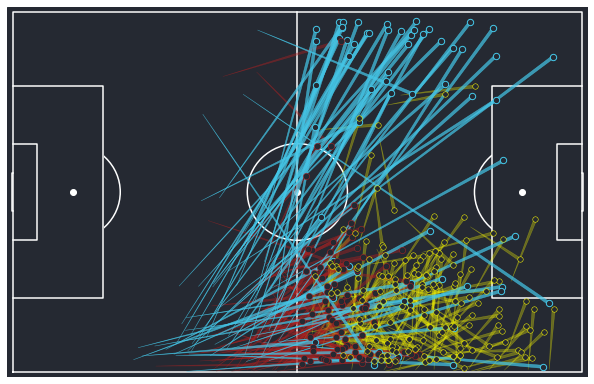

In [21]:
draw_pitch(pitch ='#252932', line ='#ffffff',orientation='horizontal', view='full')

style="wedge,tail_width=0.3"

x30 = prog30.xM.values
y30 = prog30.yM.values
xE30 = prog30.xE.values
yE30 = prog30.yE.values


plt.scatter(xE30,yE30,color="#252932",edgecolors="#45c7e8", s=40, linewidth=1, zorder=12)

for i in range(len(prog30)):
    plt.annotate('', xy=(x30[i],y30[i]), xytext=(xE30[i],yE30[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', alpha=0.7))


xF = prog15.xM.values
yF = prog15.yM.values
xEF = prog15.xE.values
yEF = prog15.yE.values
    
plt.scatter(xEF,yEF,color="#252932",edgecolors="firebrick", s=40, linewidth=0.5, zorder=12)


for i in range(len(prog15)):
    plt.annotate('', xy=(xF[i],yF[i]), xytext=(xEF[i],yEF[i]), zorder=6, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='firebrick', alpha=0.4))

xT = prog10.xM.values
yT = prog10.yM.values
xET = prog10.xE.values
yET = prog10.yE.values
    
plt.scatter(xET,yET,color="#252932",edgecolors="#fffe02", s=30, linewidth=0.5, zorder=12)


for i in range(len(prog10)):
    plt.annotate('', xy=(xT[i],yT[i]), xytext=(xET[i],yET[i]), zorder=5, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#fffe02', alpha=0.3))

plt.rcParams['axes.facecolor']='#252932'
plt.rcParams['savefig.facecolor']='#252932'

plt.savefig("TAA-pass",bbox_inches="tight",dpi=200);